In [1]:
import pandas as pd

columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area','Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t',usecols=columns)

In [3]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [4]:
# encode `Central Air` variable

df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [6]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


In [8]:
# check for null cols

df.isna().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [9]:
# dropping rows having null cols
df.dropna(axis=0, inplace=True)

In [10]:
df.isna().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

#### doing basic exploratory data analysis(eda)

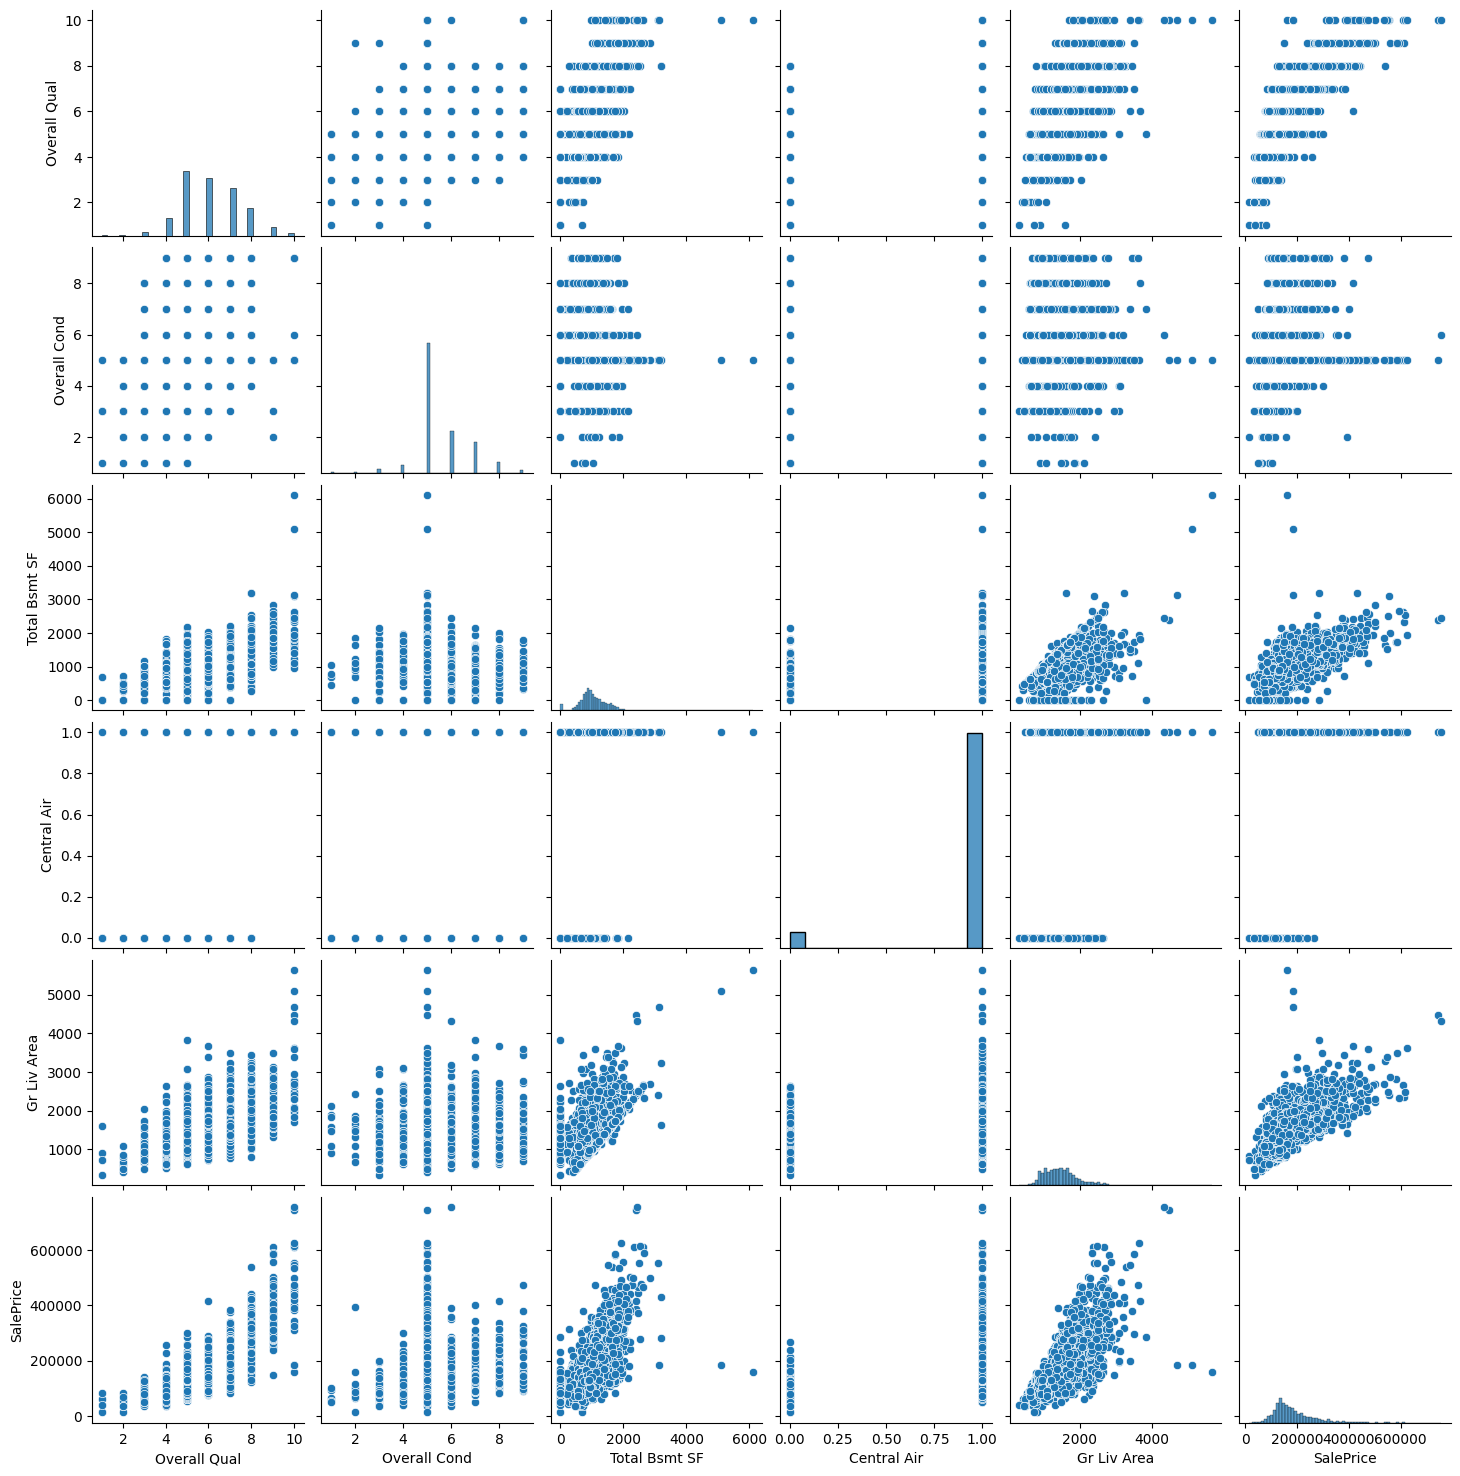

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

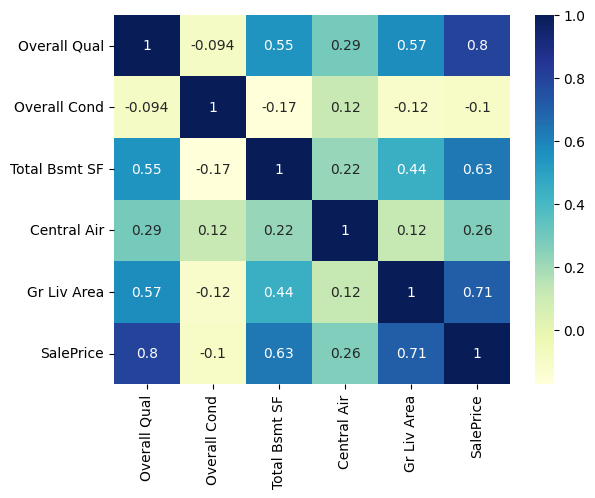

In [19]:
# correlation matrix
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
plt.show()

#### `Gr Liv Area` and `SalePrice` seems to have high correlation , let's create a basic regression model

In [20]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

from sklearn.linear_model import LinearRegression

# The linear regression implementation in scikit-learn also works (better) with unstandardized variables, 
# since it does not use (S)GD-based optimization, so we can skip the standardization step

slr = LinearRegression()
slr.fit(X, y)

LinearRegression()

#### the prediction line

In [30]:
print(f'Slope: {slr.coef_[0]:.3f}')

Slope: 111.666


In [31]:
print(f'Intercept: {slr.intercept_:.3f}')s

Intercept: 13342.979


In [33]:
slr.predict([[0]])

array([13342.97866236])

In [34]:
slr.predict([[1]])

array([13454.64492078])

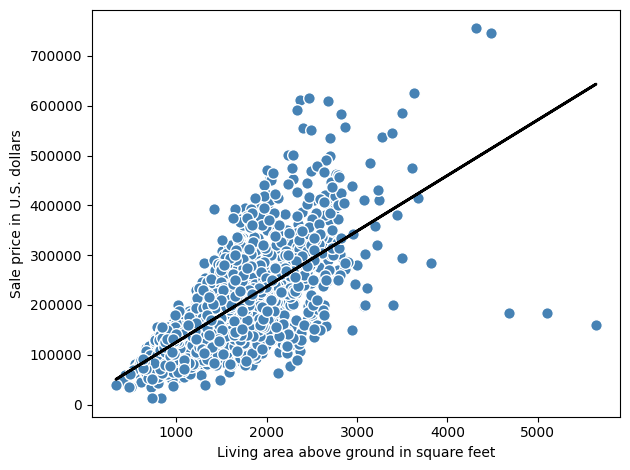

In [36]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

lin_regplot(X,y,slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.tight_layout()
plt.show()
